<a href="https://colab.research.google.com/github/monirpust/cyber-attak-detection-using-ml-dl/blob/main/ensemble_methodology_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anomaly detection using ML, DL, and Ensemble Methods for Gas Pipeline dataset 

# Importing necessary libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split


# Importing Dataset

In [3]:
names = ['address','function', 'length', 'setpoint', 'gain', 'reset rate', 'deadband', 'cycle time', 'rate', 'system mode', 'control scheme', 'pump', 'solenoid','pressure measurement','crc rate','command response','time','binary result','categorized result','specific result' ]
df = pd.read_csv('/content/drive/MyDrive/dataset/GasPipeline(GP).csv',names=names,na_values='?',index_col=None);
#df.drop(index=df.index[0], axis=0, inplace=True)
df = df.iloc[1:]
#df = data.dropna();

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [90]:
df.head()

,address,function,length,setpoint,gain,reset rate,deadband,cycle time,rate,system mode,control scheme,pump,solenoid,pressure measurement,crc rate,command response,time,binary result,categorized result,specific result
1,4,3,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12869,1,1418682163,0,0,0
2,4,3,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689655,12356,0,1418682163,0,0,0
3,4,16,90,10,115,0.2,0.5,1,0,0,1,0,0,NaN,17219,1,1418682165,0,0,0
4,4,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17718,0,1418682165,0,0,0
5,4,3,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12869,1,1418682167,0,0,0


In [4]:
df['command response'] = df['command response'].astype(np.int64)
df['command response'].unique()

array([1, 0])

In [92]:
df1=df.sort_values(by=['command response'])

# Data Manipulation

In [5]:
df1=df.sort_values(by=['command response'])
cr_col=np.array(df1['command response'])
indices=np.where(cr_col==1)
splitter=indices[0][0]

df_res,df_com=df1.head(splitter),df1.tail(len(df1)-splitter)
#print (df_res.head(6))
#print (splitter)
df_temp=df_com[['address','function', 'length', 'setpoint', 'gain', 'reset rate', 'deadband', 'cycle time', 'rate', 'system mode', 'control scheme', 'pump', 'solenoid','crc rate','binary result','categorized result']].dropna()

df_temp1=df_temp[['address','function', 'length', 'setpoint', 'gain', 'reset rate', 'deadband', 'cycle time', 'rate', 'system mode', 'control scheme', 'pump', 'solenoid','crc rate']]
df_temp2=df_temp[['binary result','categorized result']]
input_com=np.array(df_temp1)
output_com=np.array(df_temp2)


df_temp=df_res[['address','function', 'length', 'pressure measurement','crc rate','binary result','categorized result']].dropna(axis=0, how='any')
#df_temp=df_temp.dropna(axis=0, how='any')

df_temp1=df_temp[['address','function', 'length', 'pressure measurement','crc rate']]
df_temp2=df_temp[['binary result','categorized result']]
input_res=np.array(df_temp1)
output_res=np.array(df_temp2)

#print (df_temp)
print (input_com.shape, output_com.shape, input_res.shape, output_res.shape)
#df_temp.isnull()

#input1=np.array(input)
#output=df[['binary result','categorized result']]
#print (input)

(64100, 14) (64100, 2) (68848, 5) (68848, 2)


#Dividing Dataset

In [6]:
## Dividing the dataset for command type packets

ntr1 = int(input_com.shape[0]/2)
nts1 = input_com.shape[0]-ntr1
Xtr1 = input_com[:ntr1,:]
ytr1 = output_com[:ntr1,1]
ytr1=ytr1.astype('int') # converting string to int
Xts1 = input_com[:nts1,:]
yts1 = output_com[:nts1,1]
#yts1 = yts1.astype('int') # converting string to int
print (Xtr1.shape,ytr1.shape)

(32050, 14) (32050,)


# Applying Logistic Regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on training data = 0.8049921996879875


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.8049297971918877, 0.8049297971918877, 0.8049297971918877, 0.8049297971918877, 0.8049297971918877]
0.8049921996879875


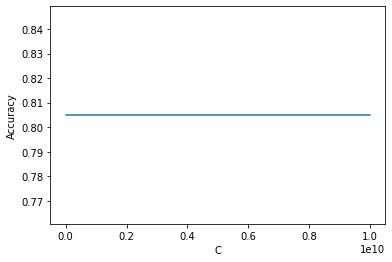

In [103]:
#Trying logistic regression
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(Xtr1,ytr1)
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts1)
#print (input_com[0]==input_com[32051])
print("Accuracy on training data =", acc)
Cs=np.logspace(5,10,5)
acc_list=[]
for C_element in Cs:
    #print (C_element)
    logreg = linear_model.LogisticRegression(C=C_element)
    logreg.fit(Xtr1,ytr1)
    yhat = logreg.predict(Xts1)
    acc_list.append(np.mean(yhat == yts1))
print (acc_list)
print (acc)
plt.plot(Cs,acc_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

# Applying SVC from SVM

In [96]:
from sklearn import svm

# Create a classifier: a support vector classifier
svc = svm.SVC(probability=False, C=5, gamma=.09,verbose=10)
svc.fit(Xtr1,ytr1)

[LibSVM]

SVC(C=5, gamma=0.09, verbose=10)

Evaluating result of SVC

In [97]:
yhat_ts = svc.predict(Xts1)
acc = np.mean(yhat_ts == yts1)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.988736


# Applying Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_clf = dt_clf.fit(Xtr1,ytr1)

#Predict the response for test dataset
y_pred = dt_clf.predict(Xts1)
acc = np.mean(y_pred == yts1)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.991264


# Appying KNN algorithm

In [108]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(Xtr1, ytr1)

#Predict the response for test dataset
y_pred = classifier.predict(Xts1)
acc = np.mean(y_pred == yts1)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.944992


# Applying Gaussian Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
naive_bayes = GaussianNB()

# Model training
naive_bayes.fit(Xtr1, ytr1)

# Model evaluation
y_pred = naive_bayes.predict(Xts1)
yts1 = yts1.astype('int') # converting string to int
accuray = accuracy_score(y_pred,yts1)
f1 = f1_score(y_pred, yts1, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8572230889235569
F1 Score: 0.8930548689505835


# Applying Local Outlier Factor (LOF)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)
lof.fit(Xtr1, ytr1)

#Predict the response for test dataset
y_pred = lof.predict(Xts1)
acc = np.mean(y_pred == yts1)
print('Accuaracy = {0:f}'.format(acc))

In [100]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, data['binary result'], test_size = 0.2, random_state=0)

# Fit the Isolation Forest model on the training data
model = IsolationForest(random_state=0)
model.fit(X_train)

# Use the model to predict on the test data
y_pred = model.predict(X_test)

# Check the accuracy of the model on the test data
print("Accuracy:", np.mean(y_pred == y_test))

names = ['address','function', 'length', 'setpoint', 'gain', 'reset rate', 'deadband', 'cycle time', 'rate', 'system mode', 'control scheme', 'pump', 'solenoid','pressure measurement','crc rate','command response','time','binary result','categorized result','specific result' ]
df = pd.read_csv('C:/Users/userlocal/Desktop/PhD/Courses/Machine_Learning/IntrusionDetection/Datasets/gas_pipeline.csv',names=names,na_values='?',index_col=None)
#df = df.dropna()
#data=np.array(df)


print (df.head(6))


NameError: ignored